In [100]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI4 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI4")
X_train = DKI4.index.values.reshape(-1, 1)
y_train = DKI4['NO2'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['NO2'].min()
max_par = DKI4['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.074
MSE: 0.005
MAE: 0.062
R-Squared: -2.261
       Tanggal        NO2
0   2022-11-30  16.981132
1   2022-12-01  16.981132
2   2022-12-02  16.981132
3   2022-12-03  17.924528
4   2022-12-04  17.924528
5   2022-12-05  17.924528
6   2022-12-06  17.924528
7   2022-12-07  17.924528
8   2022-12-08  17.924528
9   2022-12-09  17.924528
10  2022-12-10  18.867925
11  2022-12-11  18.867925
12  2022-12-12  18.867925
13  2022-12-13  18.867925
14  2022-12-14  18.867925
15  2022-12-15  18.867925
16  2022-12-16  18.867925
17  2022-12-17  18.867925
18  2022-12-18  18.867925
19  2022-12-19  18.867925
20  2022-12-20  18.867925
21  2022-12-21  18.867925
22  2022-12-22  18.867925
23  2022-12-23  18.867925
24  2022-12-24  18.867925
25  2022-12-25  18.867925
26  2022-12-26  18.867925
27  2022-12-27  18.867925
28  2022-12-28  18.867925
29  2022-12-29  18.867925


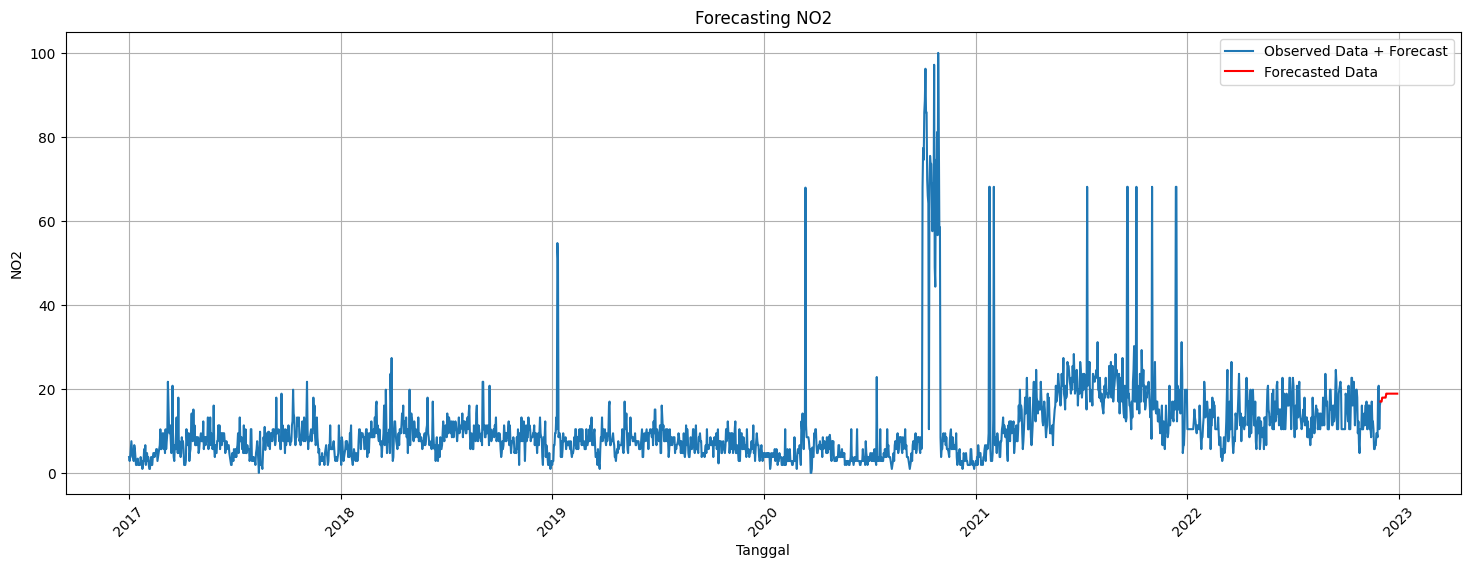

In [102]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['NO2'].min()
max_par = DKI4['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.091
MSE: 0.008
MAE: 0.083
R-Squared: -3.989
       Tanggal        NO2
0   2022-11-30  18.867925
1   2022-12-01  19.811321
2   2022-12-02  22.641509
3   2022-12-03  23.584906
4   2022-12-04  24.528302
5   2022-12-05  24.528302
6   2022-12-06  23.584906
7   2022-12-07  22.641509
8   2022-12-08  21.698113
9   2022-12-09  20.754717
10  2022-12-10  19.811321
11  2022-12-11  19.811321
12  2022-12-12  19.811321
13  2022-12-13  19.811321
14  2022-12-14  19.811321
15  2022-12-15  19.811321
16  2022-12-16  19.811321
17  2022-12-17  19.811321
18  2022-12-18  19.811321
19  2022-12-19  19.811321
20  2022-12-20  19.811321
21  2022-12-21  19.811321
22  2022-12-22  19.811321
23  2022-12-23  19.811321
24  2022-12-24  19.811321
25  2022-12-25  19.811321
26  2022-12-26  19.811321
27  2022-12-27  19.811321
28  2022-12-28  19.811321
29  2022-12-29  19.811321


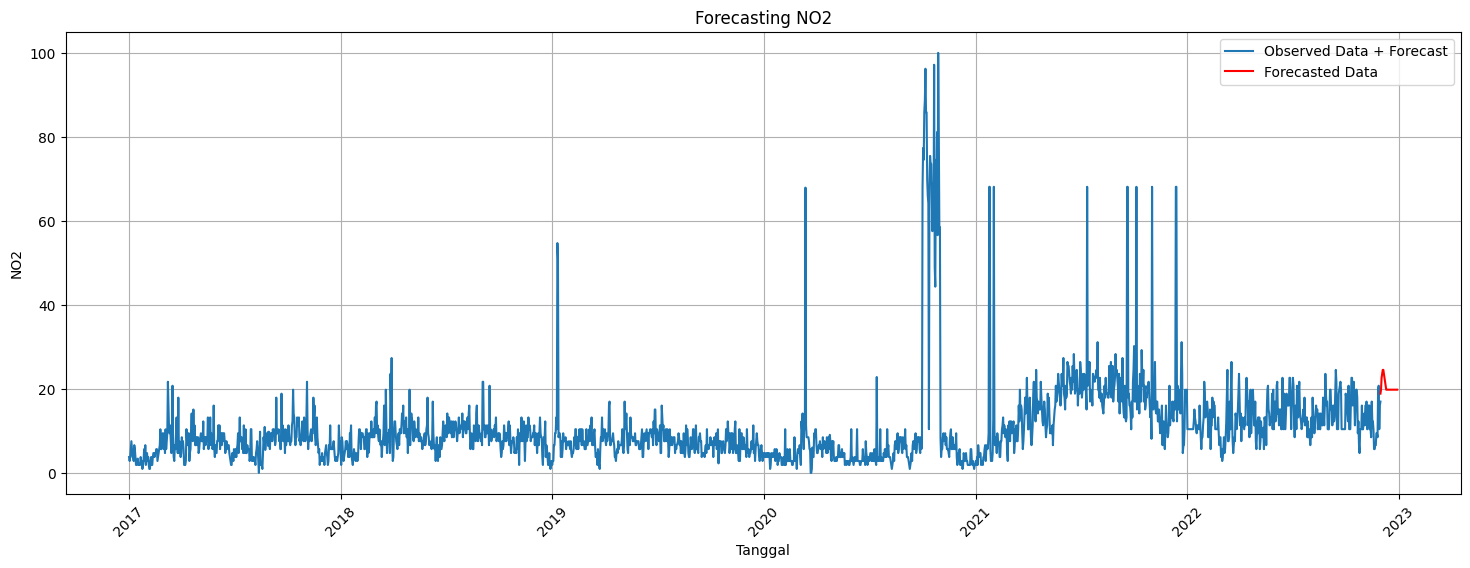

In [104]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['NO2'].min()
max_par = DKI4['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.071
MSE: 0.005
MAE: 0.059
R-Squared: -2.027
       Tanggal       NO2
0   2022-11-30  6.603774
1   2022-12-01  6.603774
2   2022-12-02  6.603774
3   2022-12-03  6.603774
4   2022-12-04  6.603774
5   2022-12-05  6.603774
6   2022-12-06  6.603774
7   2022-12-07  6.603774
8   2022-12-08  6.603774
9   2022-12-09  6.603774
10  2022-12-10  6.603774
11  2022-12-11  6.603774
12  2022-12-12  6.603774
13  2022-12-13  6.603774
14  2022-12-14  6.603774
15  2022-12-15  6.603774
16  2022-12-16  6.603774
17  2022-12-17  6.603774
18  2022-12-18  6.603774
19  2022-12-19  6.603774
20  2022-12-20  6.603774
21  2022-12-21  6.603774
22  2022-12-22  6.603774
23  2022-12-23  6.603774
24  2022-12-24  6.603774
25  2022-12-25  6.603774
26  2022-12-26  6.603774
27  2022-12-27  6.603774
28  2022-12-28  6.603774
29  2022-12-29  6.603774


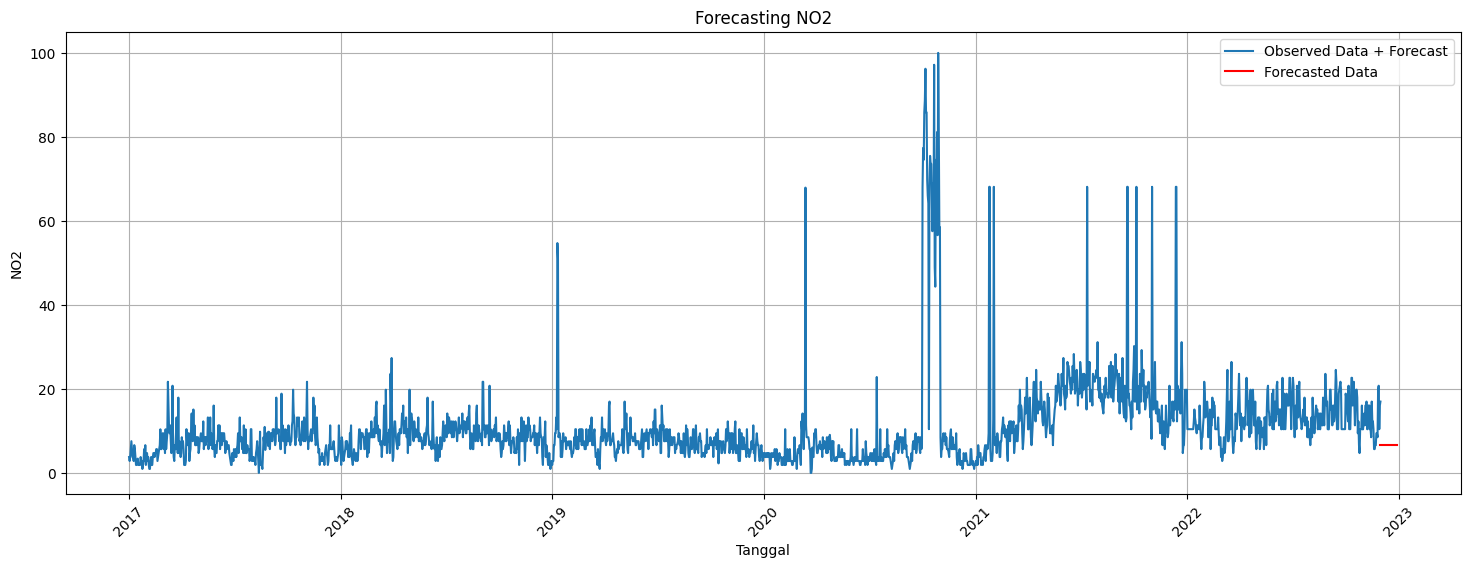

In [106]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['NO2'].min()
max_par = DKI4['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.057
MSE: 0.003
MAE: 0.046
R-Squared: -0.926
       Tanggal       NO2
0   2022-11-30  8.490566
1   2022-12-01  8.490566
2   2022-12-02  8.490566
3   2022-12-03  8.490566
4   2022-12-04  8.490566
5   2022-12-05  8.490566
6   2022-12-06  8.490566
7   2022-12-07  8.490566
8   2022-12-08  8.490566
9   2022-12-09  8.490566
10  2022-12-10  8.490566
11  2022-12-11  8.490566
12  2022-12-12  8.490566
13  2022-12-13  8.490566
14  2022-12-14  8.490566
15  2022-12-15  8.490566
16  2022-12-16  8.490566
17  2022-12-17  8.490566
18  2022-12-18  8.490566
19  2022-12-19  8.490566
20  2022-12-20  8.490566
21  2022-12-21  8.490566
22  2022-12-22  8.490566
23  2022-12-23  8.490566
24  2022-12-24  8.490566
25  2022-12-25  8.490566
26  2022-12-26  8.490566
27  2022-12-27  8.490566
28  2022-12-28  8.490566
29  2022-12-29  8.490566


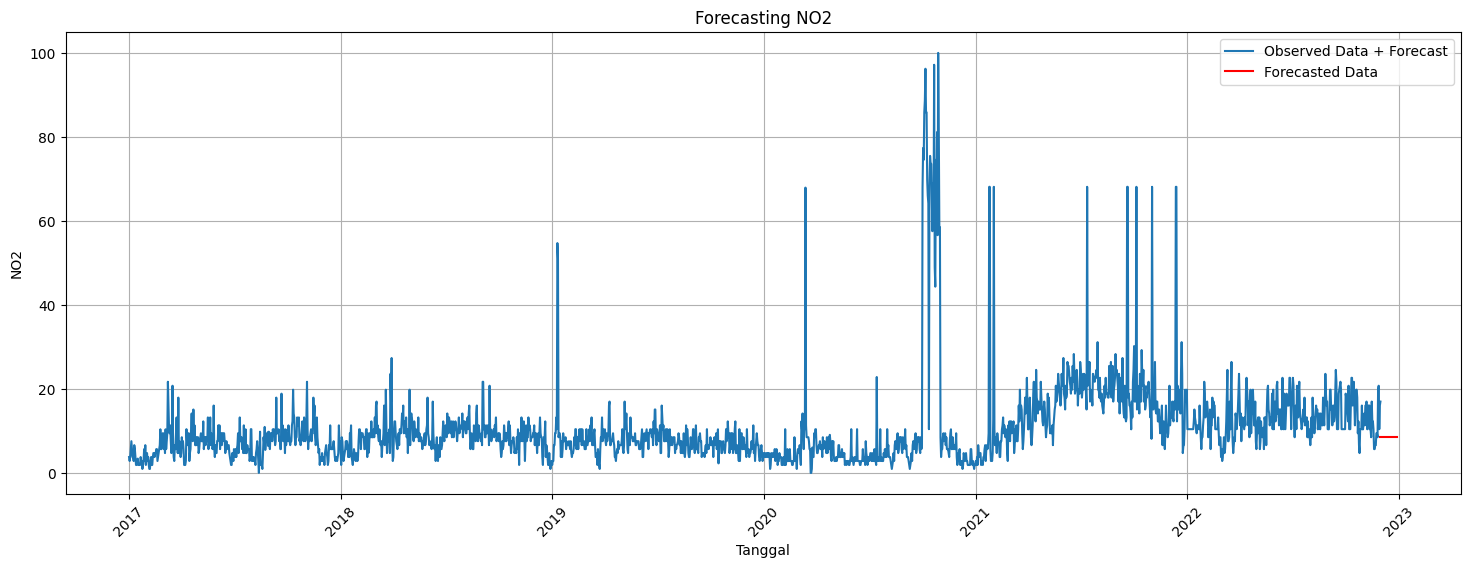

In [108]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['NO2'].min()
max_par = DKI4['NO2'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'NO2': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['NO2'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.059
MSE: 0.004
MAE: 0.048
R-Squared: -1.112
       Tanggal       NO2
0   2022-11-30  8.113208
1   2022-12-01  8.113208
2   2022-12-02  8.113208
3   2022-12-03  8.113208
4   2022-12-04  8.113208
5   2022-12-05  8.113208
6   2022-12-06  8.113208
7   2022-12-07  8.113208
8   2022-12-08  8.113208
9   2022-12-09  8.113208
10  2022-12-10  8.113208
11  2022-12-11  8.113208
12  2022-12-12  8.113208
13  2022-12-13  8.113208
14  2022-12-14  8.113208
15  2022-12-15  8.113208
16  2022-12-16  8.113208
17  2022-12-17  8.113208
18  2022-12-18  8.113208
19  2022-12-19  8.113208
20  2022-12-20  8.113208
21  2022-12-21  8.113208
22  2022-12-22  8.113208
23  2022-12-23  8.113208
24  2022-12-24  8.113208
25  2022-12-25  8.113208
26  2022-12-26  8.113208
27  2022-12-27  8.113208
28  2022-12-28  8.113208
29  2022-12-29  8.113208


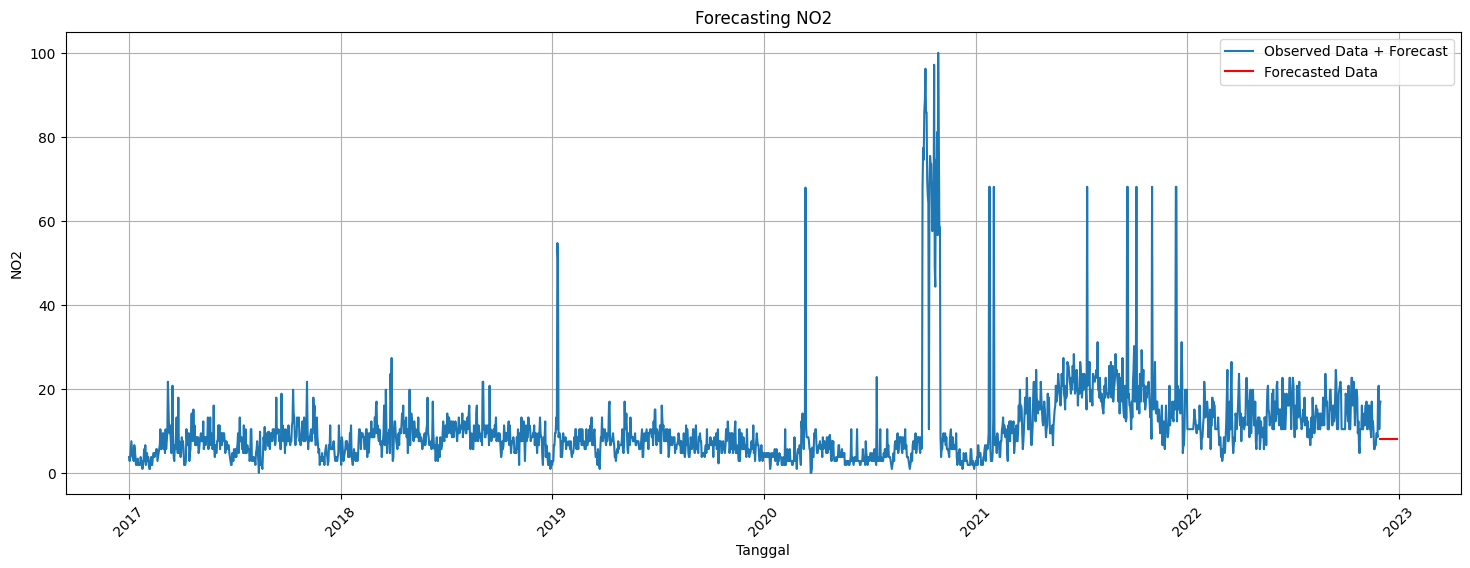

In [110]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'NO2': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'NO2']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['NO2'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('NO2')
plt.title('Forecasting NO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
